In [3]:
from d2l import torch as d2l
import torch

/Users/zhulin/anaconda3/envs/d2l/lib/python3.9/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/zhulin/anaconda3/envs/d2l/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/zhulin/anaconda3/envs/d2l/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/zhulin/anaconda3/envs/d2l/lib/p

In [5]:
#生成数据
n_train,n_test, n_feature, batch_size = 20,100,200,5
true_w,true_b = torch.ones((n_feature,1)) * 0.01, 0.05
X_train = d2l.synthetic_data(true_w,true_b,n_train)
train_iter = d2l.load_array(X_train, batch_size, True)
X_test = d2l.synthetic_data(true_w,true_b,n_test)
test_iter = d2l.load_array(X_test, batch_size, False)

In [6]:
#初始化模型参数
def init_params():
    w = torch.normal(0,1, size = (n_feature, 1),requires_grad = True)
    b = torch.zeros(1, requires_grad = True)
    return [w,b]

In [7]:
#定义L2正则
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [12]:
#定义训练
def train(lambd):
    w,b = init_params()
    net,loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs,lr = 100, 0.003
    #可视化
    animator = d2l.Animator(xlabel = 'epochs',ylabel = 'loss',yscale = 'log',xlim =[5,num_epochs],legend=['train','test'])

    #训练
    for epoch in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 13.028919219970703


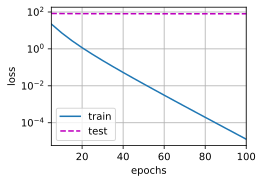

In [13]:
#忽略正则化直接训练
train(0)

w的L2范数是： 0.04654413089156151


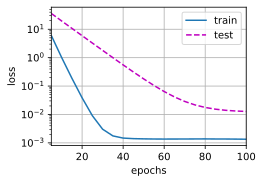

In [15]:
#使用权重衰减
train(5)

In [ ]:
#简洁实现

def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())